### Libraries

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import silhouette_score

### Dataset

In [2]:
# Loading Suicide dataset
students_data = pd.read_csv('StudentsPerformance.CSV')

# Summary of the dataset
students_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
students_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
# Calculate basic statistics and moments
moments = students_data.describe().T
moments['median'] = students_data.median()
moments['skewness'] = students_data.skew()
moments['kurtosis'] = students_data.kurt()

# Calculate the correlation matrix (dropping non-numeric columns)
correlation_matrix = students_data.select_dtypes(include='number').corr()

# Print the statistical moments
print("Statistical Moments:")
print(moments)

# Print the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

Statistical Moments:
                count    mean        std   min    25%   50%   75%    max  \
math score     1000.0  66.089  15.163080   0.0  57.00  66.0  77.0  100.0   
reading score  1000.0  69.169  14.600192  17.0  59.00  70.0  79.0  100.0   
writing score  1000.0  68.054  15.195657  10.0  57.75  69.0  79.0  100.0   

               median  skewness  kurtosis  
math score       66.0 -0.278935  0.274964  
reading score    70.0 -0.259105 -0.068265  
writing score    69.0 -0.289444 -0.033365  

Correlation Matrix:
               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


C:\Users\bonagiri\AppData\Local\Temp\ipykernel_2872\166825814.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  moments['median'] = students_data.median()
C:\Users\bonagiri\AppData\Local\Temp\ipykernel_2872\166825814.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  moments['skewness'] = students_data.skew()
C:\Users\bonagiri\AppData\Local\Temp\ipykernel_2872\166825814.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  moments['kurtosis'] = students_data.kurt()


In [5]:
students_data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df = pd.DataFrame(students_data)

# Preprocessing: Encode categorical variables
df["gender"] = df["gender"].map({"male": 0, "female": 1})

### Bar chart

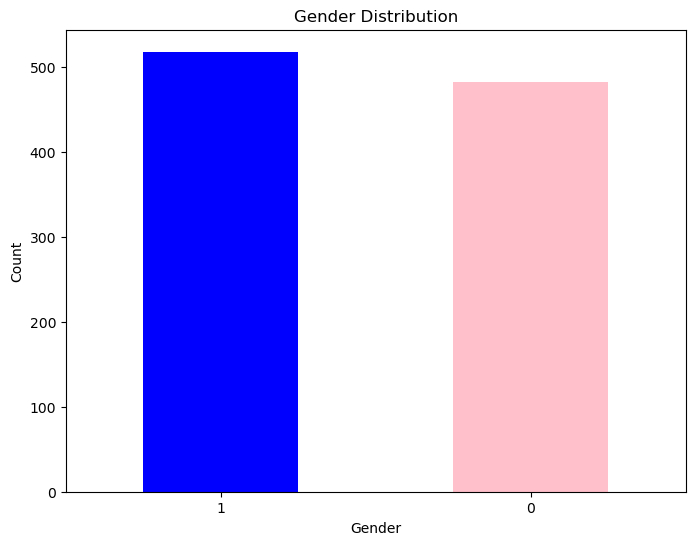

In [7]:
# Bar Chart: Gender Distribution
def plot_bar_chart(df):
    """
    Plot a bar chart of gender distribution.
    """
    gender_counts = df["gender"].value_counts()
    plt.figure(figsize=(8, 6))
    gender_counts.plot(kind="bar", color=["blue", "pink"])
    plt.title("Gender Distribution")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.xticks(ticks=[0, 1], labels=gender_counts.index, rotation=0)
    plt.show()

plot_bar_chart(df)

### Scatter plot

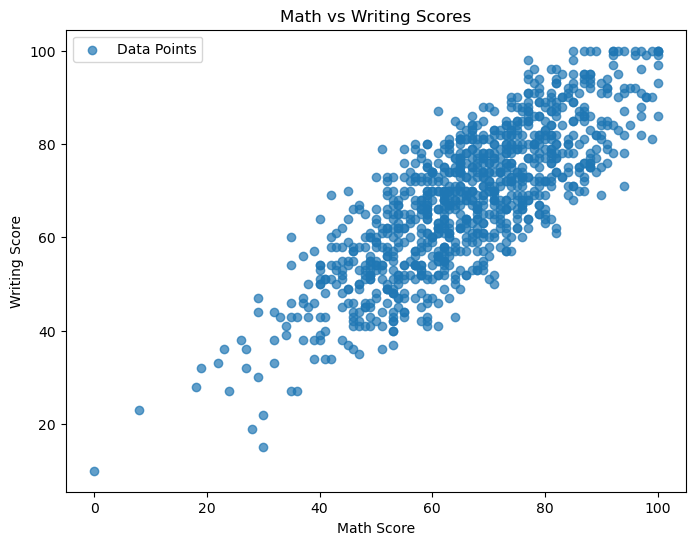

In [8]:
# Scatter Plot: Math vs Writing Scores with Line Fitting
def plot_scatter(df):
    """
    Plot a scatter plot of Math vs Writing scores.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(df["math score"], df["writing score"], alpha=0.7, label="Data Points")
    plt.title("Math vs Writing Scores")
    plt.xlabel("Math Score")
    plt.ylabel("Writing Score")
    plt.legend()
    plt.show()

plot_scatter(df)

### Heatmap

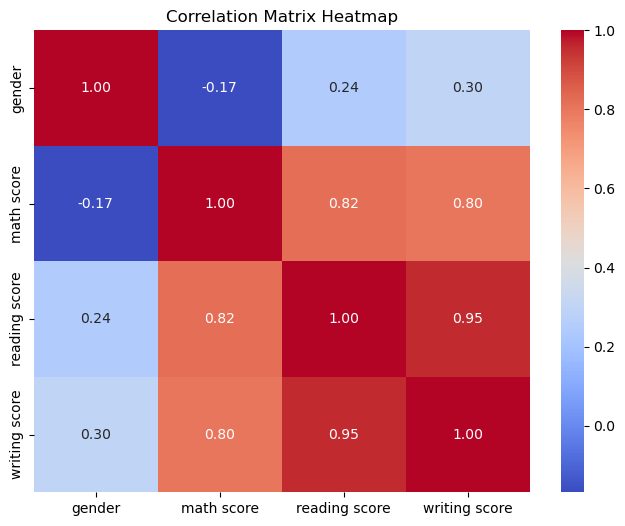

In [9]:
# Heatmap: Correlation Matrix
def plot_heatmap(df):
    """
    Plot a heatmap of the correlation matrix.
    """
    corr_matrix = df.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

plot_heatmap(df)

### Clustering

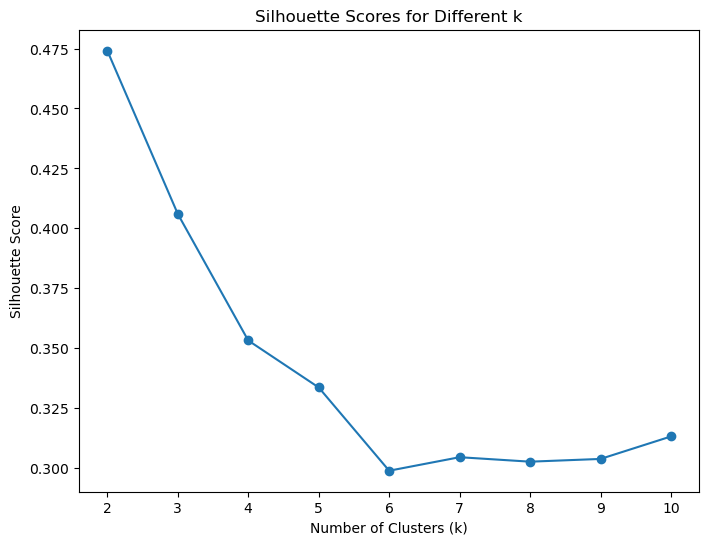

In [10]:
# Scaling numerical features for clustering
scaler = StandardScaler()
scaled_scores = scaler.fit_transform(df[["math score", "reading score", "writing score"]])

# Silhouette Score for Optimal k
def plot_silhouette(scaled_data):
    silhouette_scores = []
    k_range = range(2, 11)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(scaled_data)
        silhouette_scores.append(silhouette_score(scaled_data, labels))
    plt.figure(figsize=(8, 6))
    plt.plot(k_range, silhouette_scores, marker="o")
    plt.title("Silhouette Scores for Different k")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.show()

plot_silhouette(scaled_scores)

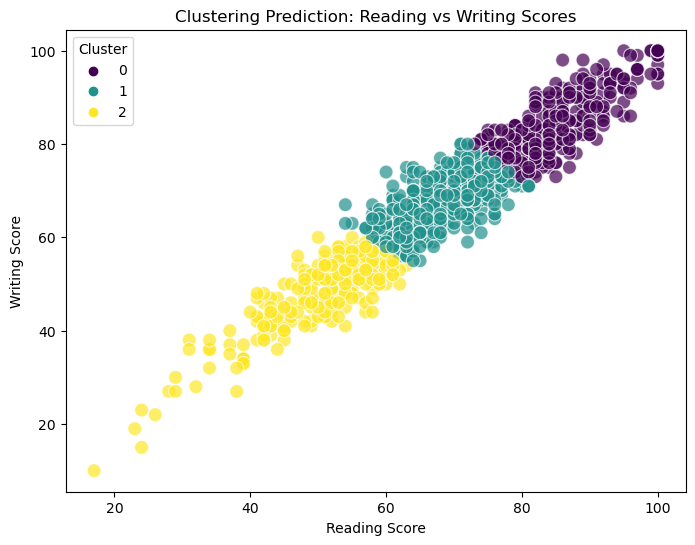

In [11]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[["reading score", "writing score"]])

# Define a function for clustering prediction visualization
def plot_clustering_prediction(df):
    """
    Visualize clustering results for Reading vs Writing scores.
    """
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=df["reading score"], 
        y=df["writing score"], 
        hue=df["Cluster"], 
        palette="viridis", 
        s=100,
        alpha=0.7
    )
    plt.title("Clustering Prediction: Reading vs Writing Scores")
    plt.xlabel("Reading Score")
    plt.ylabel("Writing Score")
    plt.legend(title="Cluster")
    plt.show()

# Call the function to visualize clustering results
plot_clustering_prediction(df)

### Fitting

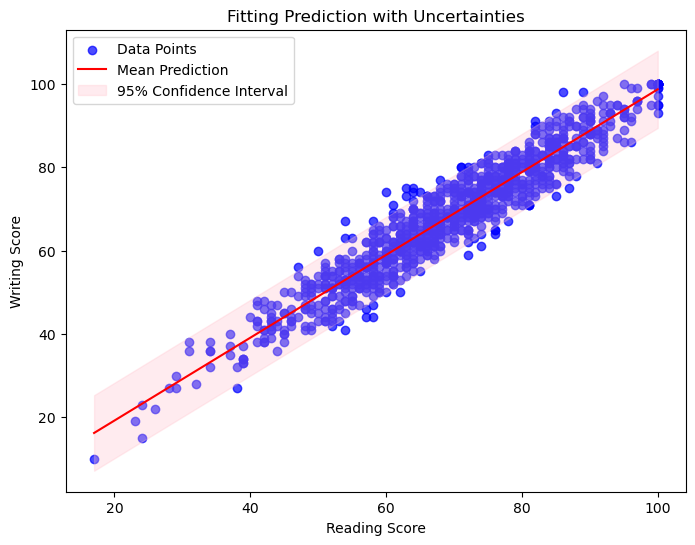

In [12]:
# Define the data
X = df[["reading score"]].values
y = df["writing score"].values

# Fit Bayesian Linear Regression
bayesian_reg = BayesianRidge()
bayesian_reg.fit(X, y)

# Generate predictions with uncertainties
X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred, y_std = bayesian_reg.predict(X_pred, return_std=True)

# Visualize the fitting prediction with uncertainties
def plot_fitting_prediction_with_uncertainty(X, y, X_pred, y_pred, y_std):
    """
    Plot fitting prediction with associated uncertainties.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color="blue", alpha=0.7, label="Data Points")
    plt.plot(X_pred, y_pred, color="red", label="Mean Prediction")
    plt.fill_between(
        X_pred.flatten(),
        y_pred - 2 * y_std,
        y_pred + 2 * y_std,
        color="pink",
        alpha=0.3,
        label="95% Confidence Interval"
    )
    plt.title("Fitting Prediction with Uncertainties")
    plt.xlabel("Reading Score")
    plt.ylabel("Writing Score")
    plt.legend()
    plt.show()

# Call the function to visualize
plot_fitting_prediction_with_uncertainty(X, y, X_pred, y_pred, y_std)